# Evaluate

We assess the Reinforcement Policy Agent by measuring its win rate against the Random Agent.

In [1]:
from RL_Agent import DoubleQLearning, QLearning, SARSA, DeepQLearning
from env.Environment import TicTacToe
import random
from tabulate import tabulate
import matplotlib.pyplot as plt


In [2]:
SARSA_p1, SARSA_p2 = SARSA.SARSAAgent(), SARSA.SARSAAgent()

QLearning_p1, QLearning_p2 = QLearning.QLearningAgent(), QLearning.QLearningAgent()

DoubleQLearning_p1, DoubleQLearning_p2 = DoubleQLearning.DoubleQLearningAgent(), DoubleQLearning.DoubleQLearningAgent()

DeepQLearning_p1, DeepQLearning_p2 = DeepQLearning.DeepQLearningAgent(), DeepQLearning.DeepQLearningAgent()


In each policy trained over 1,000,000 episodes, we meticulously analyze various metrics such as convergence rates, strategic adaptability, and performance consistency against a baseline like the Random Agent. This approach not only validates the efficacy of our training methodologies but also provides deep insights into the agent's learning dynamics and decision-making capabilities."

In [3]:
####### SARSA ########
SARSA_p1.load('SARSA_p1')
SARSA_p2.load('SARSA_p2')

####### QLearning ########
QLearning_p1.load('QLearning_p1')
QLearning_p2.load('QLearning_p2')

####### DoubleQLearning ########
DoubleQLearning_p1.load('DoubleQLearning_p1')
DoubleQLearning_p2.load('DoubleQLearning_p2')


# ####### DeepQLearning ########
# QLearning_p1.load('./save/QLearning_p1.save')
# QLearning_p2.load('./save/QLearning_p2.save')

Loaded Weight !!   SARSA
Loaded Weight !!   SARSA
Loaded Weight !!   QLearning
Loaded Weight !!   QLearning
Loaded Weight !!   DoubleQLearning
Loaded Weight !!   DoubleQLearning


## Evaluate with random policy

In [4]:
env = TicTacToe()
episode = 10000

In [5]:
def testing(agent, first=False, episode=1000):
    p1_win = 0
    p2_win = 0
    reward_p1 = 0
    reward_p2 = 0
    tie = 0
    random.seed(0)
    
    for _ in range(episode):
        state = env.reset()
        done = False
        
        while not done:
            # Player 1's turn
            if first:
                action = agent.get_max_action(state)
            else:
                action = agent.get_random_action(state)
            
            reward, next_state, done = env.step(action)
            reward_p1 += reward
            
            if done:
                if reward == 100:
                    p1_win += 1
                elif reward == 50:
                    tie += 1
                break
            
            env.change_player()
            state = next_state

            # Player 2's turn
            if not first:
                action = agent.get_max_action(state)
            else:
                action = agent.get_random_action(state)
            
            reward, next_state, done = env.step(action)
            reward_p2 += reward
            
            if done:
                if reward == 100:
                    p2_win += 1
                elif reward == 50:
                    tie += 1
                break
            
            env.change_player()
            state = next_state

    return p1_win/episode, p2_win/episode, tie/episode, reward_p1/episode, reward_p2/episode


### As player 1

In [6]:
agent_p1 = [SARSA_p1, QLearning_p1, DoubleQLearning_p1]

# Initialize a list to store the results for the table
results_p1 = []

for agent in agent_p1:
    p1_winrate, p2_winrate, tie_rate, avg_rewardp1, avg_rewardp2 = testing(agent, first=True, episode=episode)
    results_p1.append([agent.name, p1_winrate, p2_winrate, tie_rate, avg_rewardp1, avg_rewardp2])

# Define the headers for the table
headers = ["Agent", "Winrate P1", "Winrate P2", "Tie Rate", "Avg Reward P1", "Avg Reward P2"]

# Print the table
print(tabulate(results_p1, headers=headers, tablefmt="pretty"))

+-----------------+------------+------------+----------+---------------+---------------+
|      Agent      | Winrate P1 | Winrate P2 | Tie Rate | Avg Reward P1 | Avg Reward P2 |
+-----------------+------------+------------+----------+---------------+---------------+
|      SARSA      |   0.9182   |   0.0054   |  0.0764  |    82.423     |    -12.65     |
|    QLearning    |   0.8998   |   0.0258   |  0.0744  |    81.1485    |    -9.8425    |
| DoubleQLearning |   0.9515   |   0.014    |  0.0345  |     85.72     |    -9.685     |
+-----------------+------------+------------+----------+---------------+---------------+


### As player 2

In [7]:
agent_p2 = [SARSA_p2, QLearning_p2, DoubleQLearning_p2]

# Initialize a list to store the results for the table
results_p2 = []

for agent in agent_p2:
    p1_winrate, p2_winrate, tie_rate, avg_rewardp1, avg_rewardp2 = testing(agent, first=False, episode=episode)
    results_p2.append([agent.name, p1_winrate, p2_winrate, tie_rate, avg_rewardp1, avg_rewardp2])

# Define the headers for the table
headers = ["Agent", "Winrate P1", "Winrate P2", "Tie Rate", "Avg Reward P1", "Avg Reward P2"]

# Print the table
print(tabulate(results_p2, headers=headers, tablefmt="pretty"))

+-----------------+------------+------------+----------+---------------+---------------+
|      Agent      | Winrate P1 | Winrate P2 | Tie Rate | Avg Reward P1 | Avg Reward P2 |
+-----------------+------------+------------+----------+---------------+---------------+
|      SARSA      |   0.1069   |   0.6908   |  0.2023  |     3.529     |    55.258     |
|    QLearning    |   0.0763   |   0.791    |  0.1327  |    -2.659     |    66.131     |
| DoubleQLearning |   0.1032   |   0.7084   |  0.1884  |    2.4645     |    57.1065    |
+-----------------+------------+------------+----------+---------------+---------------+


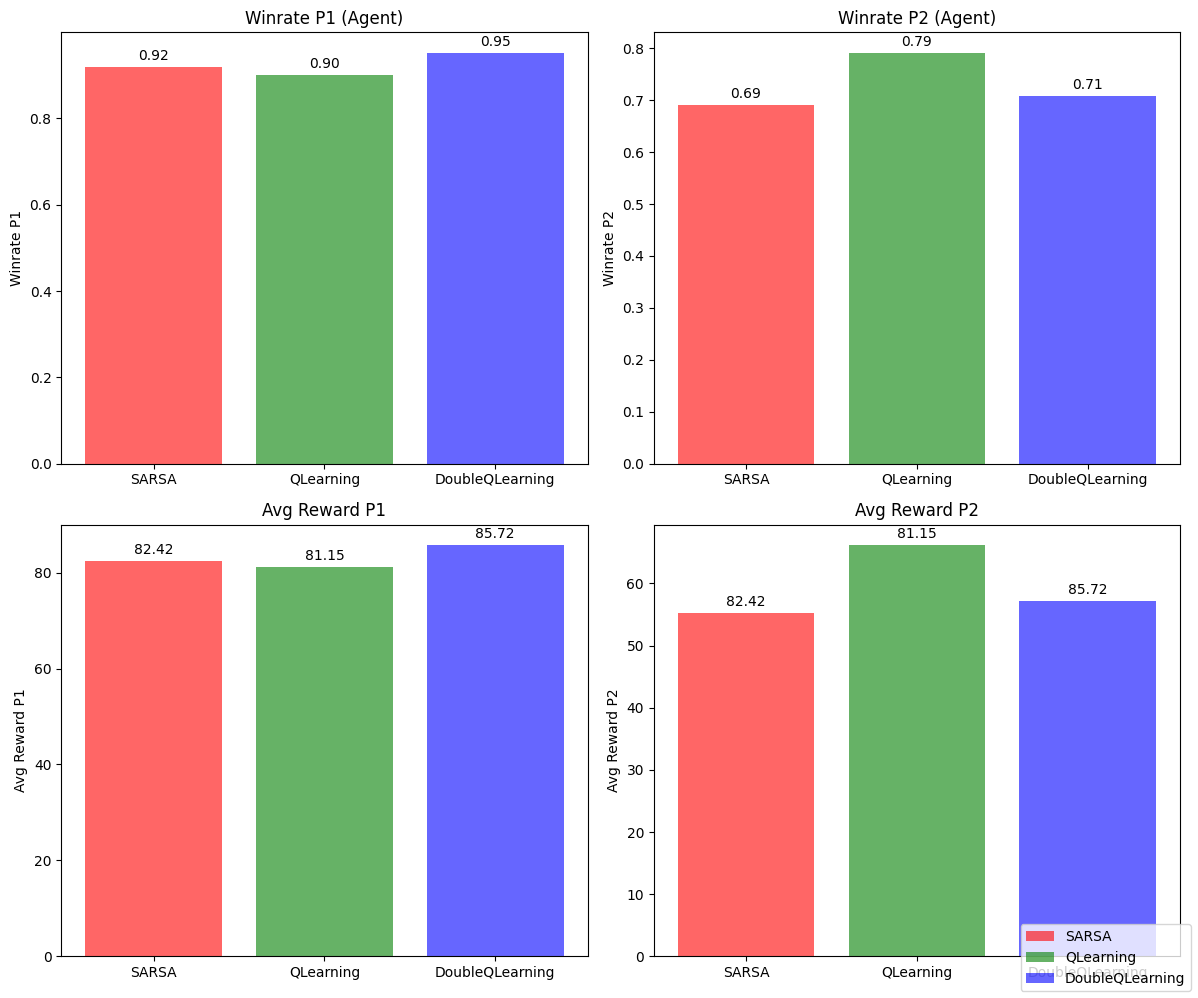

In [8]:

agent_list = agent_p1

agents = [agent.name for agent in agent_list]
winrate_p1 = [result[1] for result in results_p1]
winrate_p2 = [result[2] for result in results_p2]
avg_reward_p1 = [result[4] for result in results_p1]
avg_reward_p2 = [result[5] for result in results_p2]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Bar plot for Winrate P1
bars1 = axs[0, 0].bar(agents, winrate_p1, color=['r','g','b'], alpha=0.6, label=agents)
axs[0, 0].set_ylabel('Winrate P1')
axs[0, 0].set_title(f'Winrate P1 (Agent)')
for bar, winrate in zip(bars1, winrate_p1):
    axs[0, 0].annotate(f'{winrate:.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                        xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Bar plot for Winrate P2
bars2 = axs[0, 1].bar(agents, winrate_p2, color=['r','g','b'], alpha=0.6)
axs[0, 1].set_ylabel('Winrate P2')
axs[0, 1].set_title(f'Winrate P2 (Agent)')
for bar, winrate in zip(bars2, winrate_p2):
    axs[0, 1].annotate(f'{winrate:.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                        xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Bar plot for Average Rewards P1
bar3 = axs[1, 0].bar(agents, avg_reward_p1, color=['r','g','b'], alpha=0.6)
axs[1, 0].set_ylabel('Avg Reward P1')
axs[1, 0].set_title(f'Avg Reward P1')
for bar, winrate in zip(bar3, avg_reward_p1):
    axs[1, 0].annotate(f'{winrate:.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                        xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Bar plot for Average Rewards P2
bar4 = axs[1, 1].bar(agents, avg_reward_p2, color=['r','g','b'], alpha=0.6)
axs[1, 1].set_ylabel('Avg Reward P2')
axs[1, 1].set_title(f'Avg Reward P2')
for bar, winrate in zip(bar4, avg_reward_p1):
    axs[1, 1].annotate(f'{winrate:.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                        xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    
# Add a legend for colors
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right')

# Adjust layout
plt.tight_layout()
plt.show()





## Evaluate with figt each other

In [9]:
def testing_vs(agent1, agent2, episode=1000):
    p1_win = 0
    p2_win = 0
    reward_p1 = 0
    reward_p2 = 0
    tie = 0
    random.seed(0)

    for _ in range(episode):
        state = env.reset()
        done = False
        
        while not done:
            # Player 1's turn
            action = agent1.get_max_action(state)
            reward, next_state, done = env.step(action)
            reward_p1 += reward
            
            if done:
                if reward == 100:
                    p1_win += 1
                elif reward == 50:
                    tie += 1
                break
            
            env.change_player()
            state = next_state

            # Player 2's turn
            action = agent2.get_max_action(state)
            reward, next_state, done = env.step(action)
            reward_p2 += reward
            
            if done:
                if reward == 100:
                    p2_win += 1
                elif reward == 50:
                    tie += 1
                break
            
            env.change_player()
            state = next_state

    return p1_win / episode, p2_win / episode, tie / episode, reward_p1 / episode, reward_p2 / episode


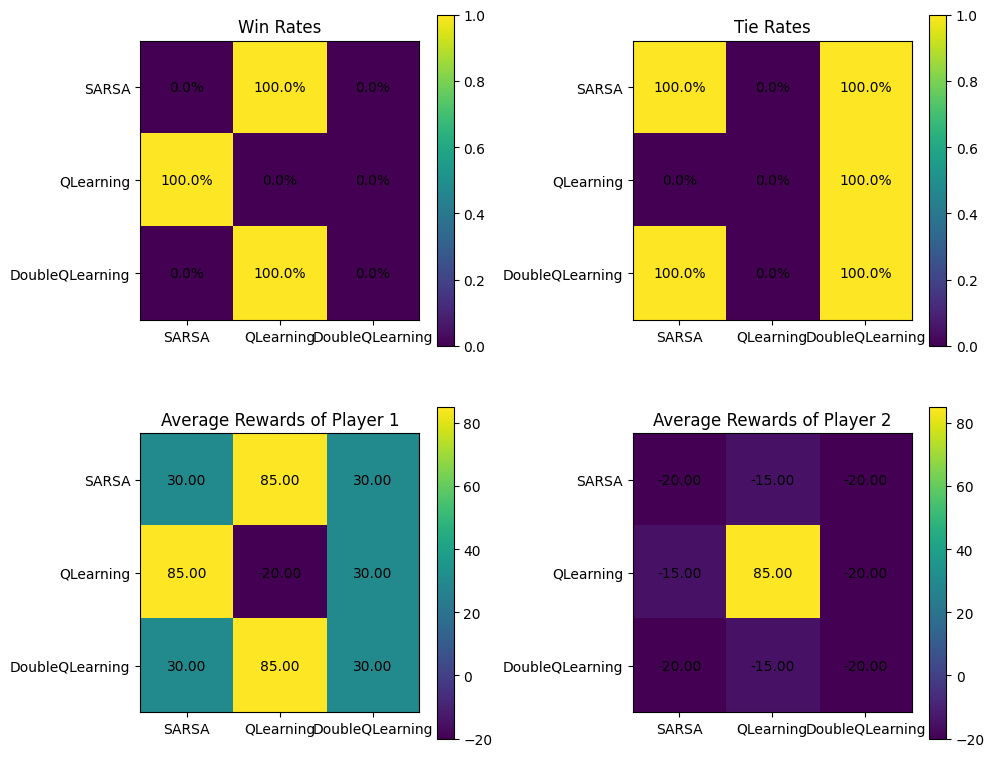

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assume agent_p1 and agent_p2 lists contain instances of agents with a 'name' attribute.
agent_p1 = [SARSA_p1, QLearning_p1, DoubleQLearning_p1]
agent_p2 = [SARSA_p2, QLearning_p2, DoubleQLearning_p2]

# Initialize arrays to store performance metrics
win_rates = np.zeros((len(agent_p1), len(agent_p2)))
tie_rates = np.zeros((len(agent_p1), len(agent_p2)))
avg_rewards_p1 = np.zeros((len(agent_p1), len(agent_p2)))
avg_rewards_p2 = np.zeros((len(agent_p1), len(agent_p2)))

# Test each pair of agents
for i, agent1 in enumerate(agent_p1):
    for j, agent2 in enumerate(agent_p2):
        p1_winrate, p2_winrate, tie_rate, avg_rewardp1, avg_rewardp2 = testing_vs(agent1, agent2, episode=1000)
        win_rates[i, j] = p1_winrate
        tie_rates[i, j] = tie_rate
        avg_rewards_p1[i, j] = avg_rewardp1
        avg_rewards_p2[i, j] = avg_rewardp2

# Plotting the results as a heatmap with annotations
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot Win Rates
im = axs[0, 0].imshow(win_rates, cmap='viridis')

# Add numerical annotations
for i in range(len(agent_p1)):
    for j in range(len(agent_p2)):
        text = axs[0, 0].text(j, i, f'{win_rates[i, j]*100:.1f}%', ha='center', va='center', color='black')

axs[0, 0].set_xticks(np.arange(len(agent_p2)))
axs[0, 0].set_yticks(np.arange(len(agent_p1)))
axs[0, 0].set_xticklabels([agent.name for agent in agent_p2])
axs[0, 0].set_yticklabels([agent.name for agent in agent_p1])
axs[0, 0].set_title('Win Rates')
plt.colorbar(im, ax=axs[0, 0])

# Plot Tie Rates
im = axs[0, 1].imshow(tie_rates, cmap='viridis')

# Add numerical annotations
for i in range(len(agent_p1)):
    for j in range(len(agent_p2)):
        text = axs[0, 1].text(j, i, f'{tie_rates[i, j]*100:.1f}%', ha='center', va='center', color='black')

axs[0, 1].set_xticks(np.arange(len(agent_p2)))
axs[0, 1].set_yticks(np.arange(len(agent_p1)))
axs[0, 1].set_xticklabels([agent.name for agent in agent_p2])
axs[0, 1].set_yticklabels([agent.name for agent in agent_p1])
axs[0, 1].set_title('Tie Rates')
plt.colorbar(im, ax=axs[0, 1])

# Plot Average Rewards Player 1
im = axs[1, 0].imshow(avg_rewards_p1, cmap='viridis')

# Add numerical annotations
for i in range(len(agent_p1)):
    for j in range(len(agent_p2)):
        text = axs[1, 0].text(j, i, f'{avg_rewards_p1[i, j]:.2f}', ha='center', va='center', color='black')

axs[1, 0].set_xticks(np.arange(len(agent_p2)))
axs[1, 0].set_yticks(np.arange(len(agent_p1)))
axs[1, 0].set_xticklabels([agent.name for agent in agent_p2])
axs[1, 0].set_yticklabels([agent.name for agent in agent_p1])
axs[1, 0].set_title('Average Rewards of Player 1')
plt.colorbar(im, ax=axs[1, 0])

# Plot Average Rewards Player 2
im = axs[1, 1].imshow(avg_rewards_p2, cmap='viridis')

# Add numerical annotations
for i in range(len(agent_p1)):
    for j in range(len(agent_p2)):
        text = axs[1, 1].text(j, i, f'{avg_rewards_p2[i, j]:.2f}', ha='center', va='center', color='black')

axs[1, 1].set_xticks(np.arange(len(agent_p2)))
axs[1, 1].set_yticks(np.arange(len(agent_p1)))
axs[1, 1].set_xticklabels([agent.name for agent in agent_p2])
axs[1, 1].set_yticklabels([agent.name for agent in agent_p1])
axs[1, 1].set_title('Average Rewards of Player 2')
plt.colorbar(im, ax=axs[1, 1])

plt.tight_layout()
plt.show()
